In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1567,2020-09-08,United Kingdom,348702.0,350100.0,41596.0,41554.0,-1398.0,42.0
1568,2020-09-08,Germany,251768.0,252298.0,9332.0,9329.0,-530.0,3.0
1569,2020-09-08,Iran,390618.0,388810.0,22524.0,22410.0,1808.0,114.0
1570,2020-09-08,Turkey,281157.0,281509.0,6718.0,6730.0,-352.0,-12.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  9008.527353689567
RMSE =  34493.809657128535


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  302.0178117048346
RMSE =  742.4126888118938


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  64156.63087248322
RMSE =  108514.17410401514
-- World performances for deaths --
MAE =  1703.4496644295302
RMSE =  2079.578535642749


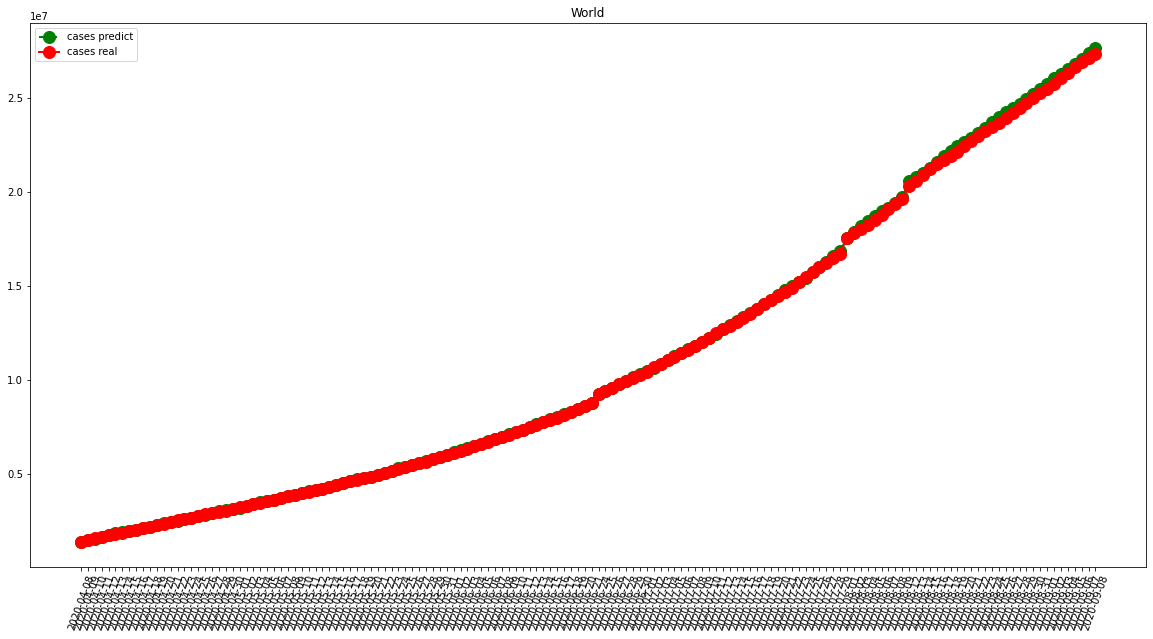

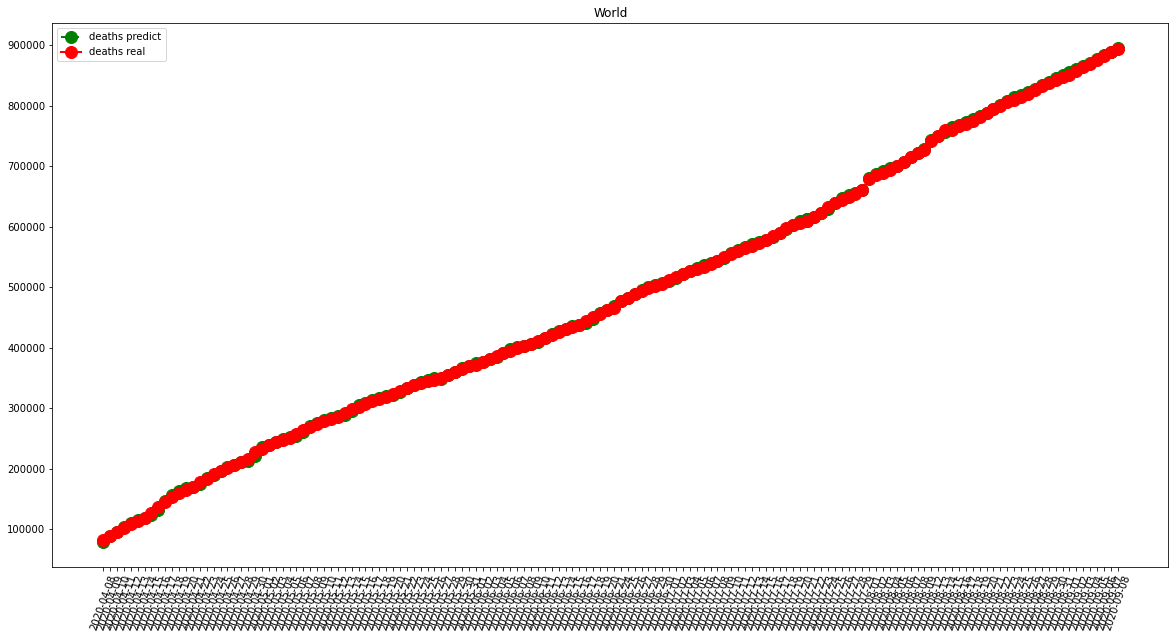

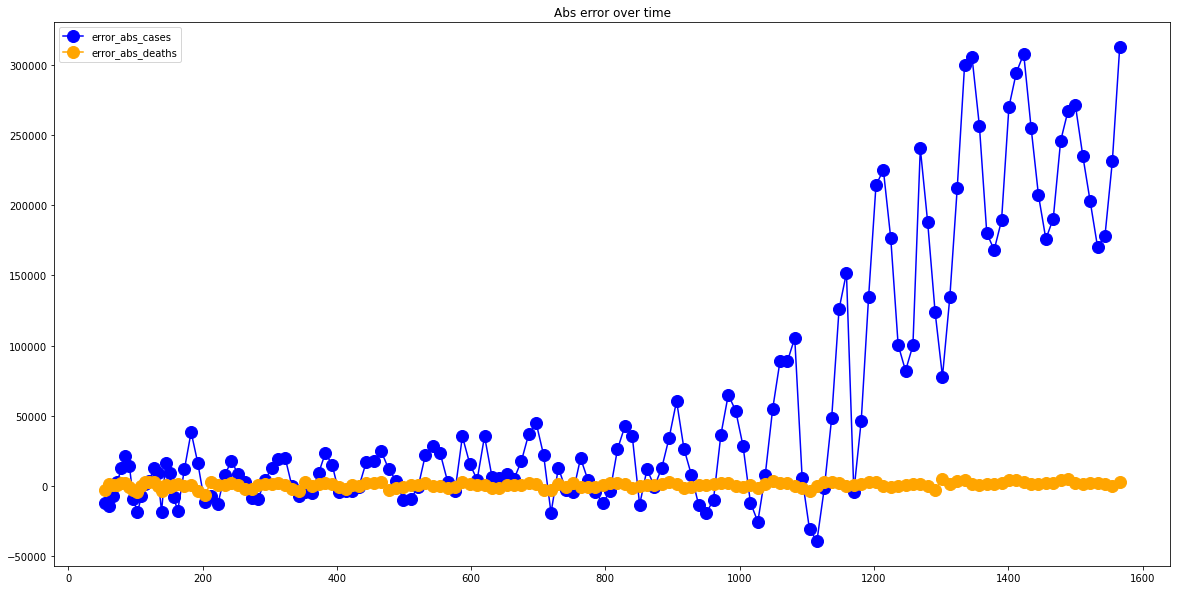

In [7]:
visShow("World")

-- France performances for cases --
MAE =  1033.3270440251572
RMSE =  1539.6403872374156
-- France performances for deaths --
MAE =  118.21383647798743
RMSE =  266.0566450303015


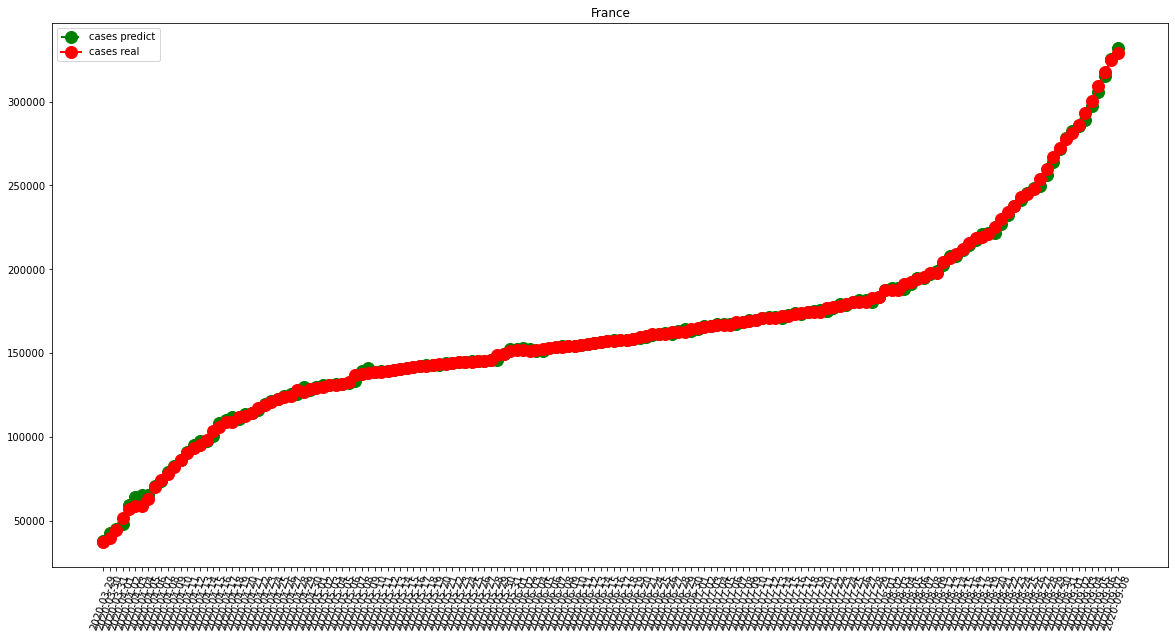

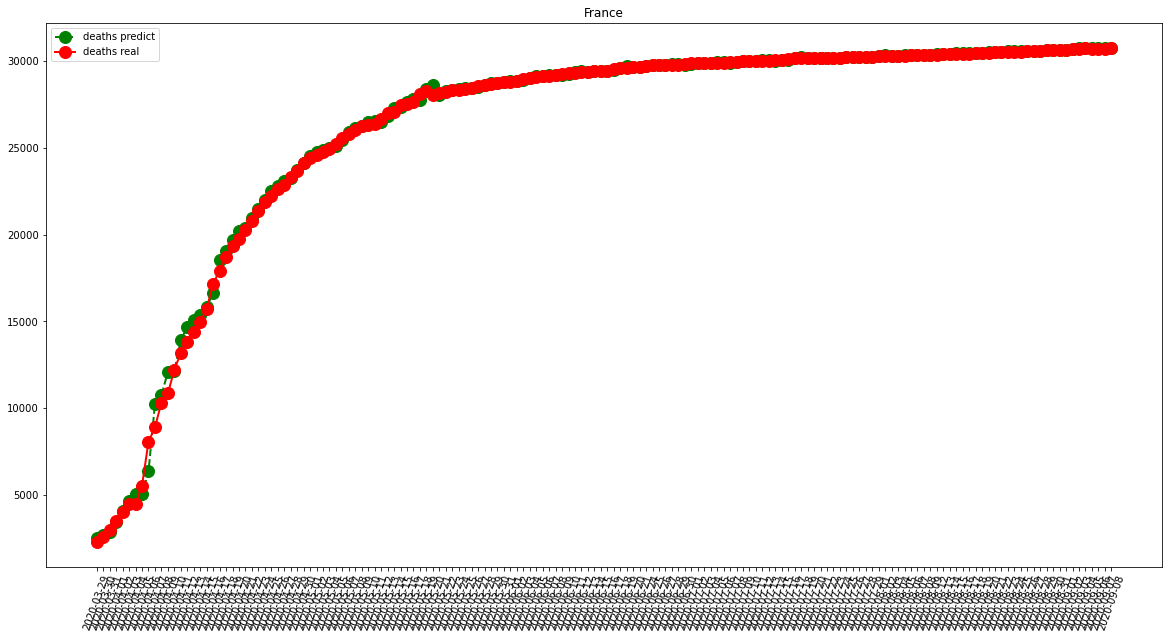

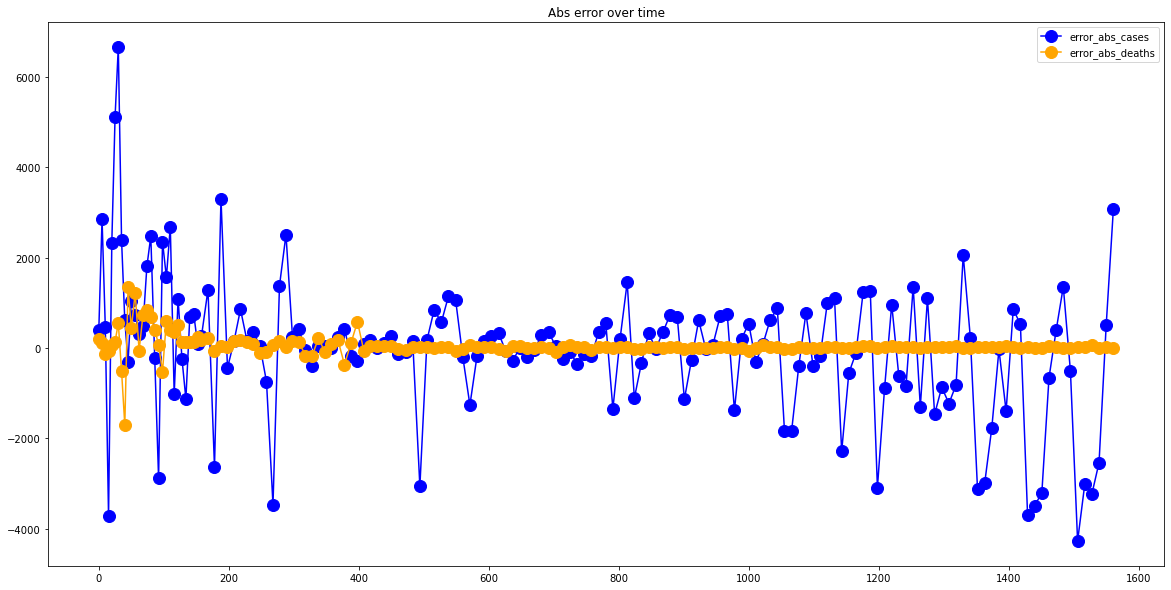

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  305.9308176100629
RMSE =  453.4803706235591
-- Italy performances for deaths --
MAE =  70.81132075471699
RMSE =  235.445235924401


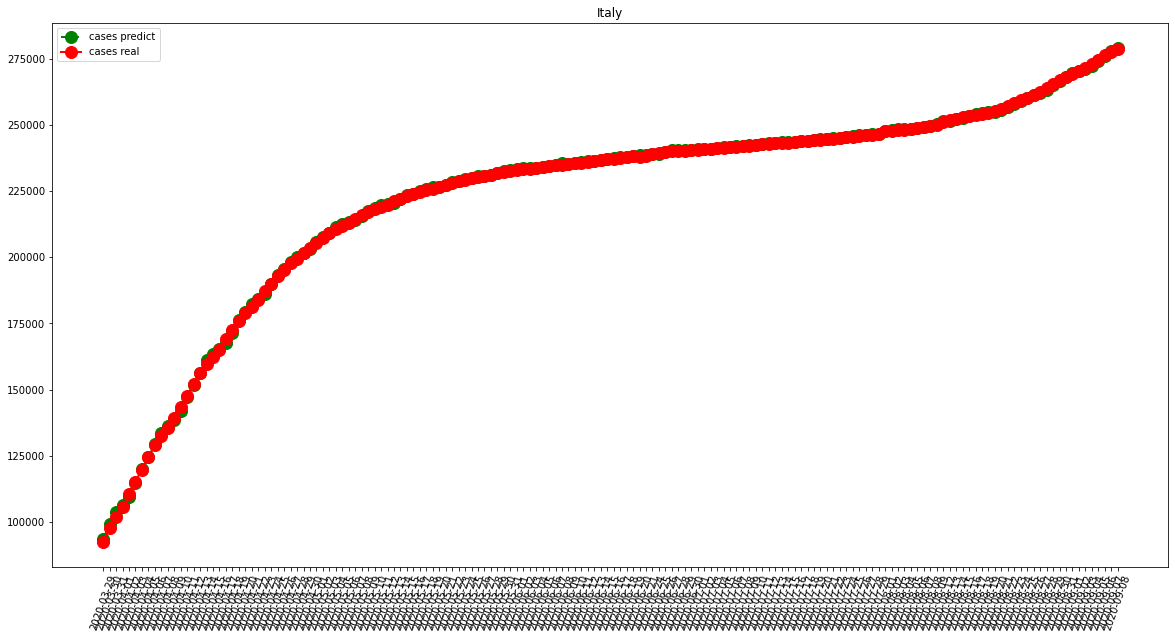

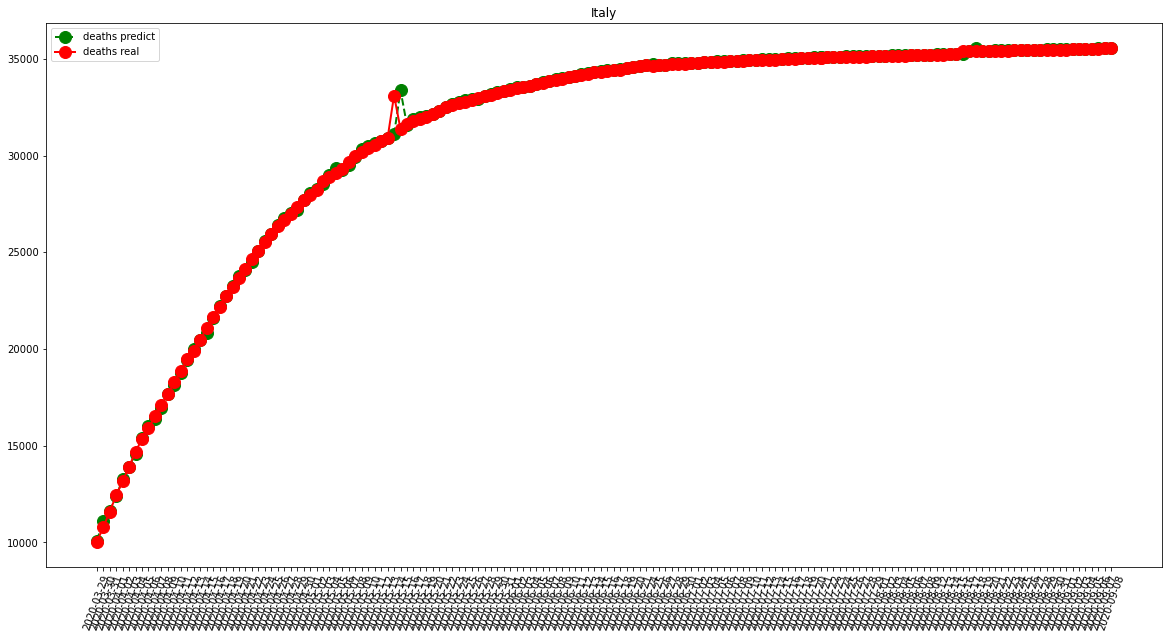

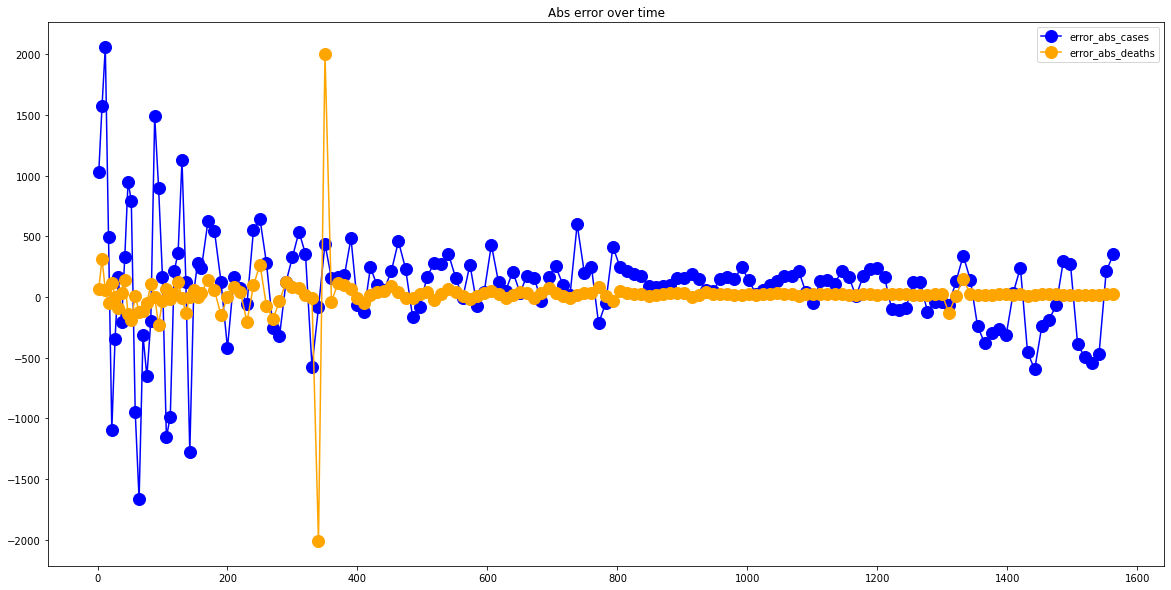

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  2204.7295597484276
RMSE =  4395.34108120471
-- Spain performances for deaths --
MAE =  124.0503144654088
RMSE =  322.80280017178


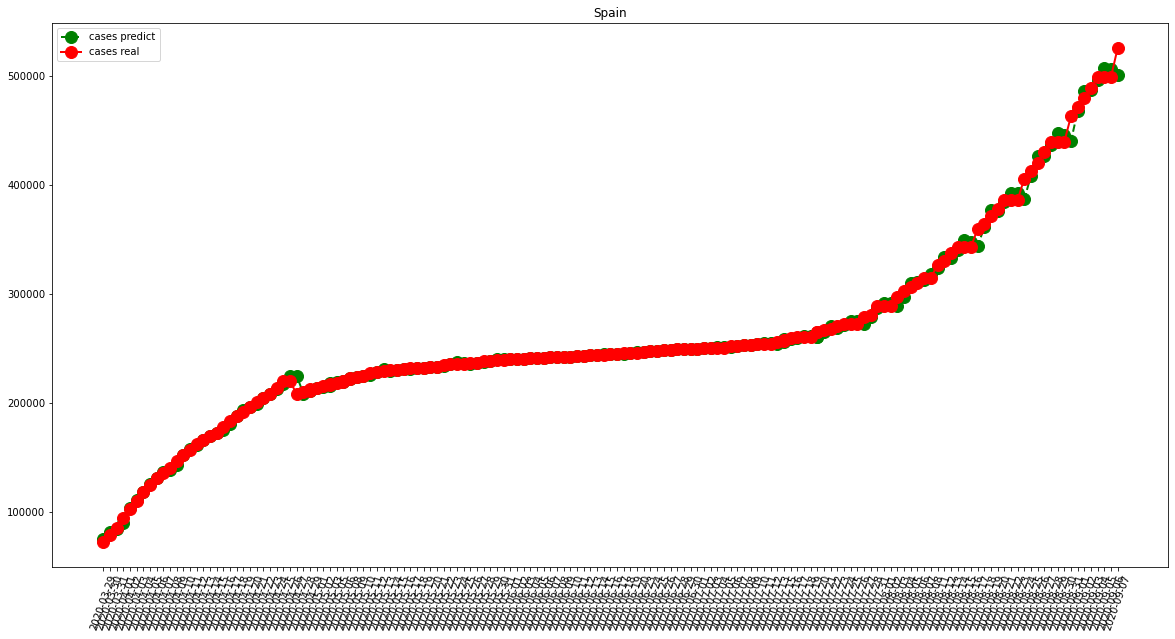

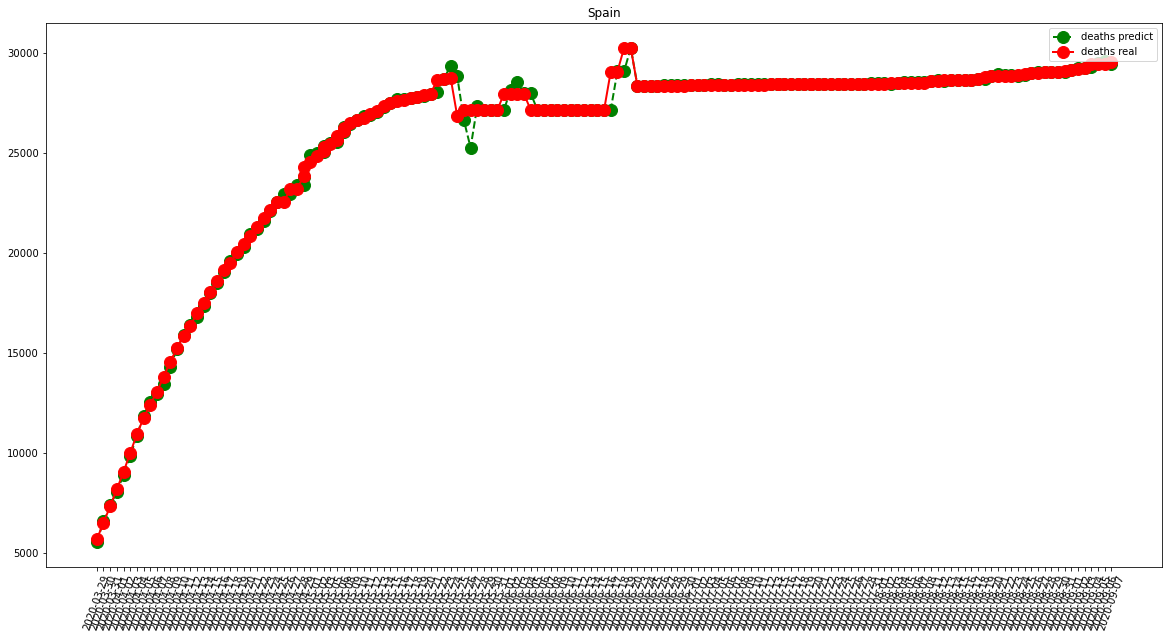

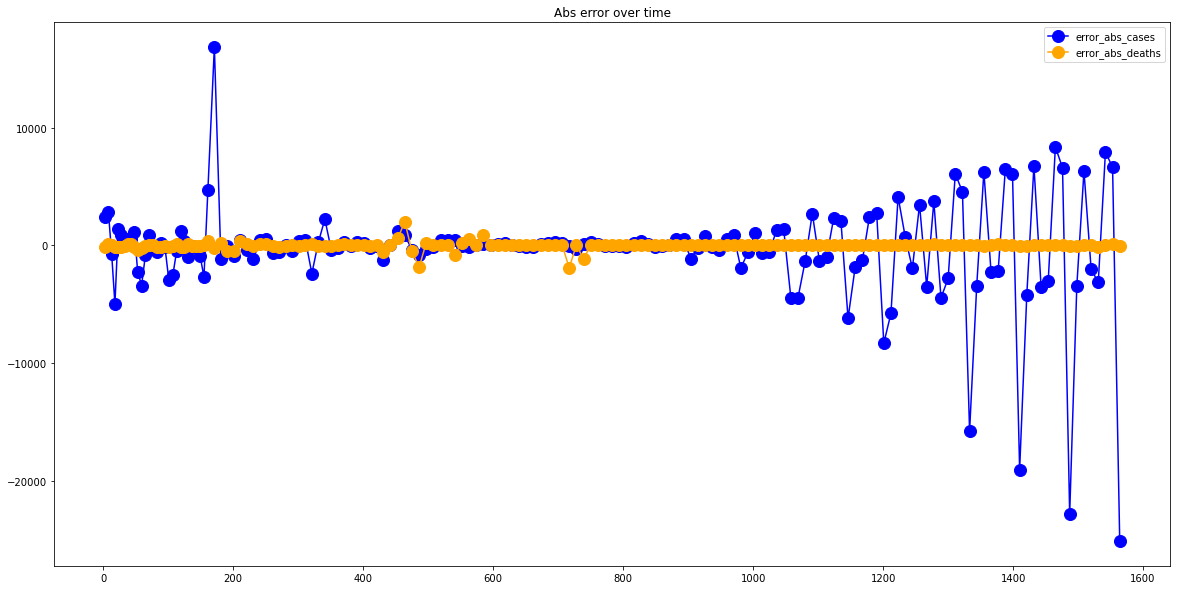

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  13511.817610062893
RMSE =  20811.68952141678
-- United States performances for deaths --
MAE =  487.6792452830189
RMSE =  685.8815701722032


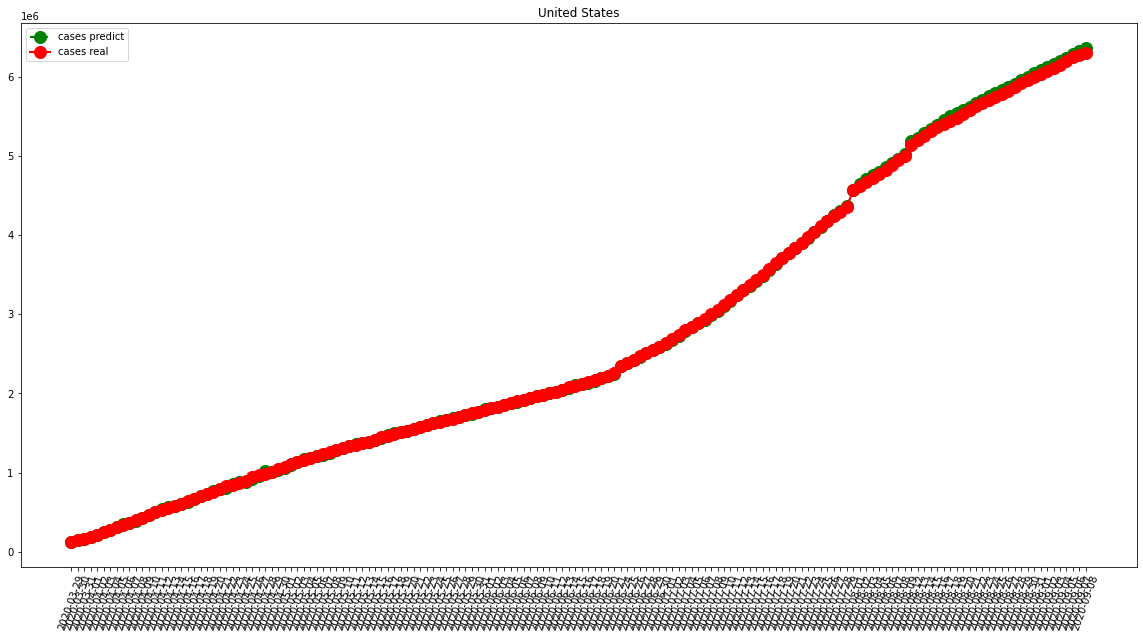

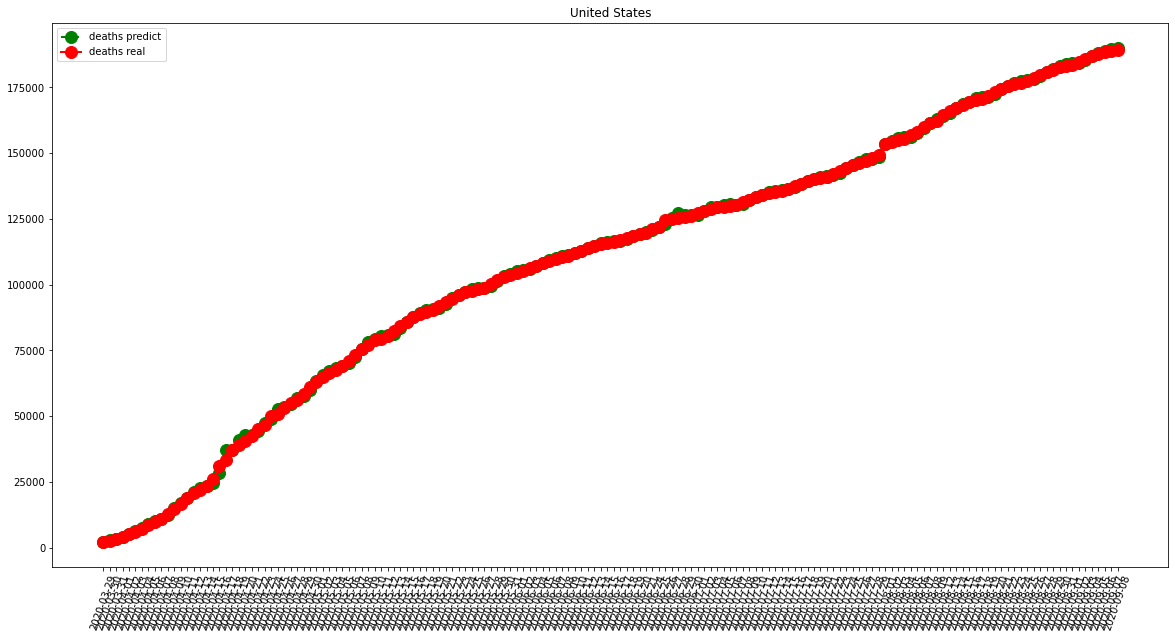

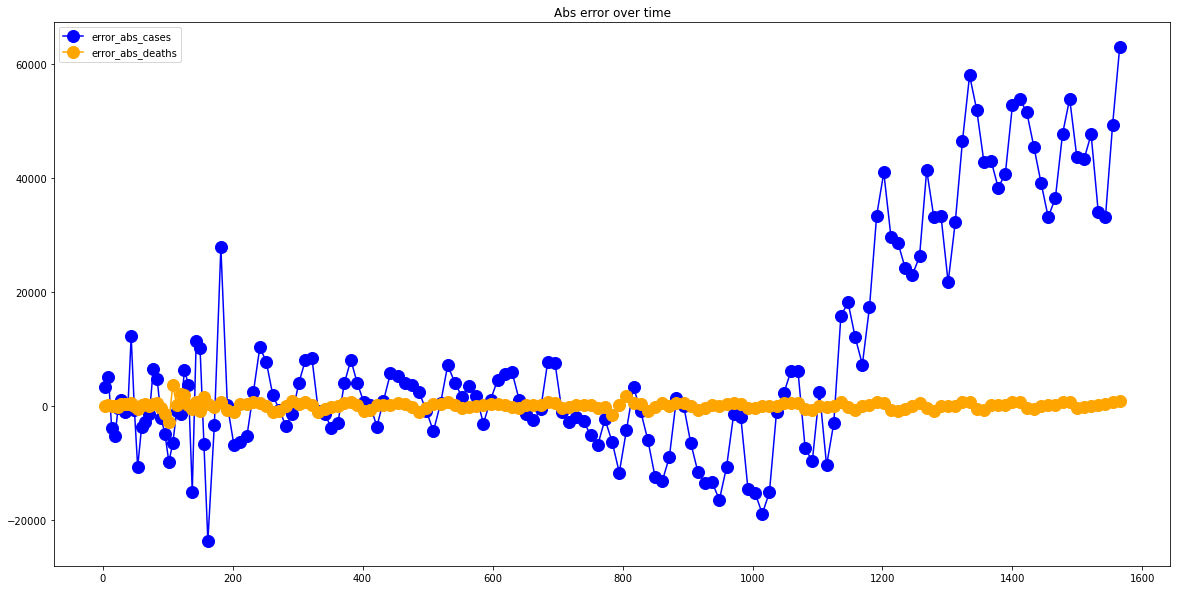

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  63.257861635220124
RMSE =  94.64166114960807
-- China performances for deaths --
MAE =  26.440251572327043
RMSE =  124.5330397421559


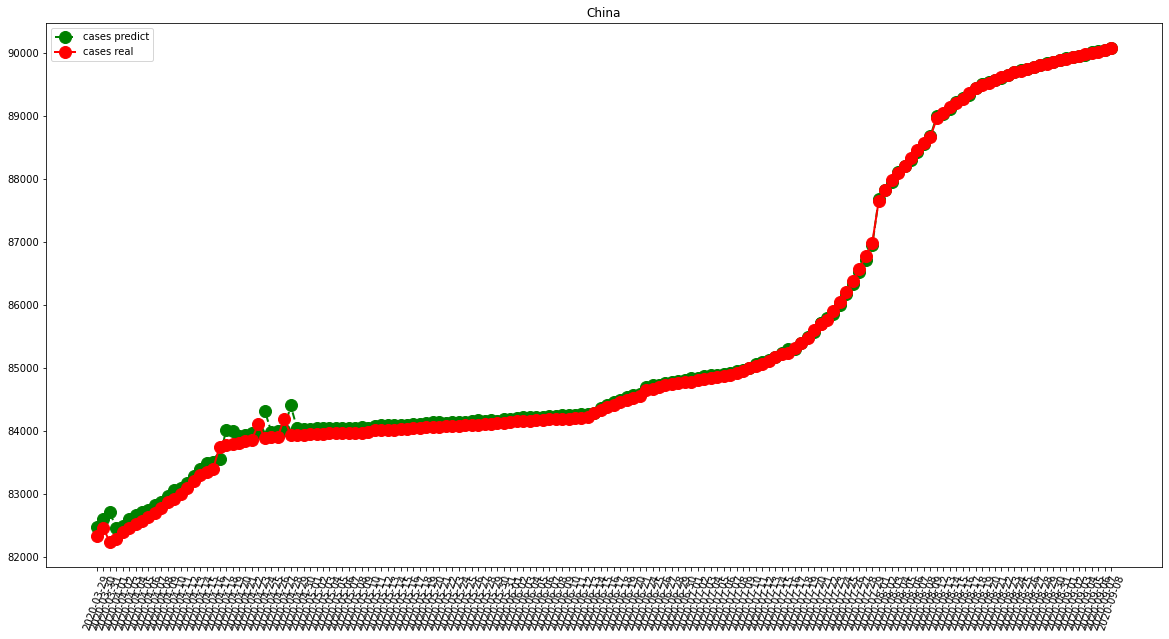

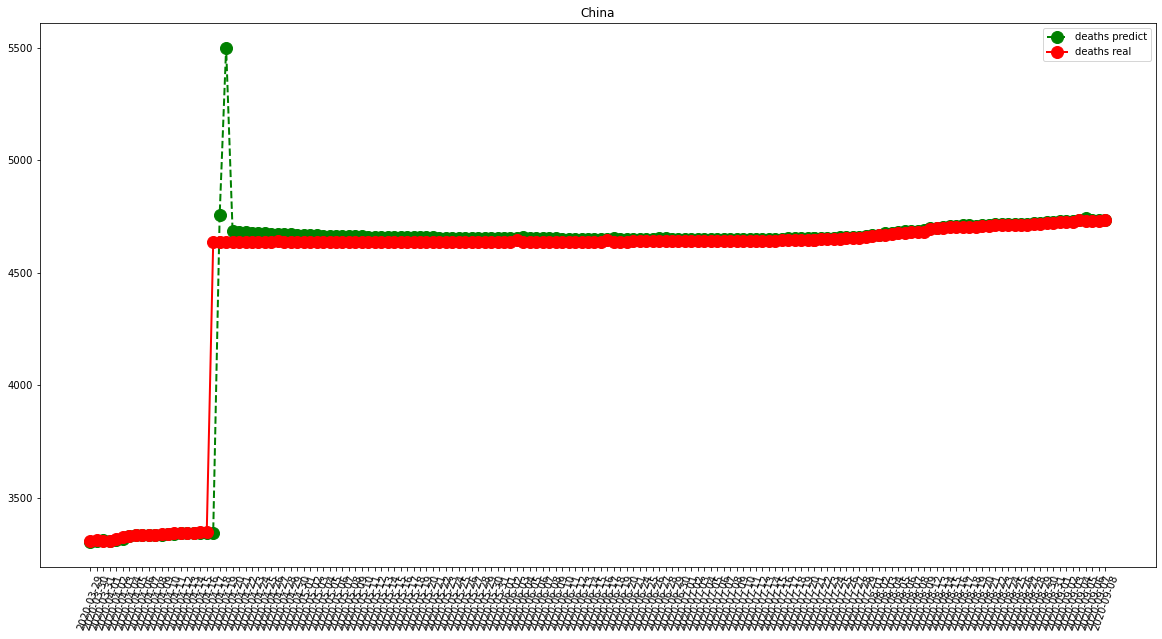

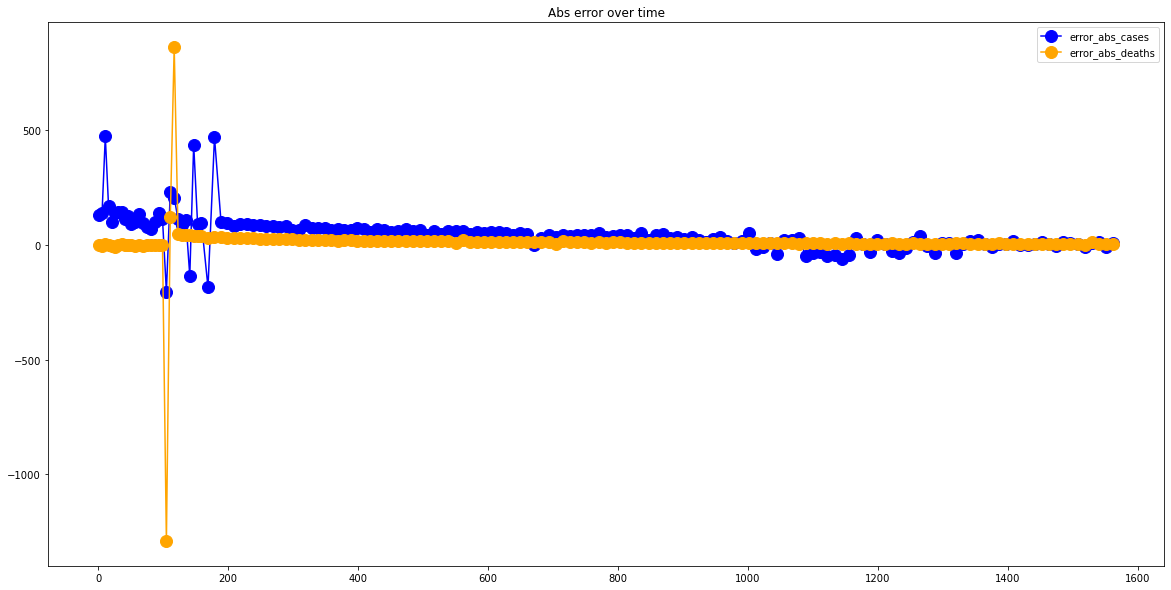

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1034.381679389313
RMSE =  3657.393703484775
-- United Kingdom performances for deaths --
MAE =  232.6412213740458
RMSE =  745.6713354139445


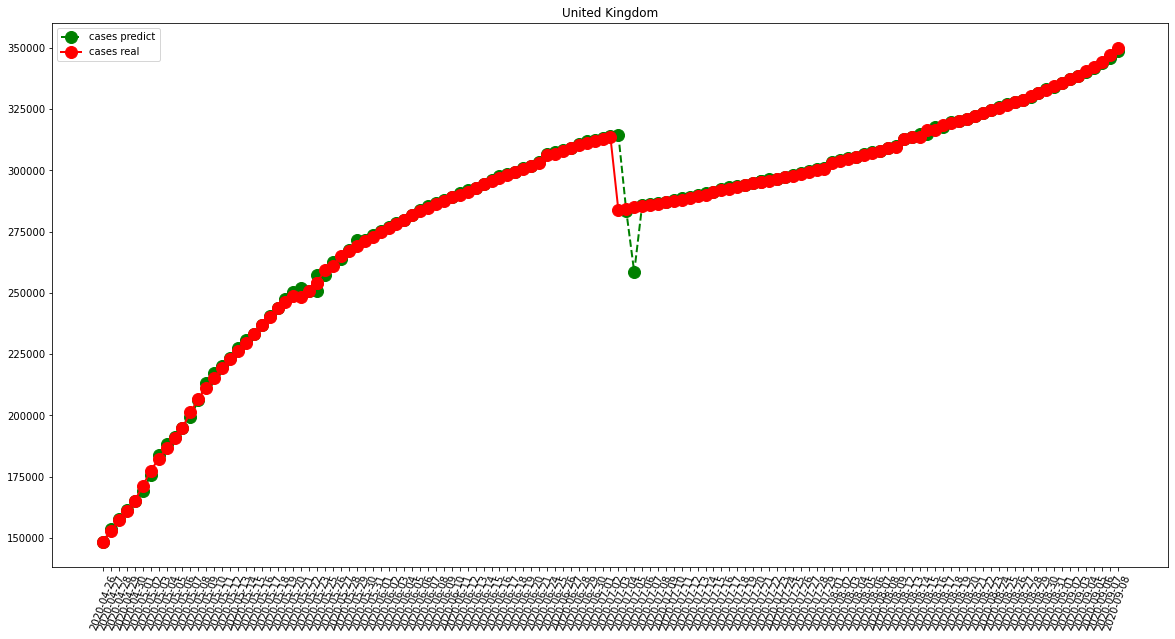

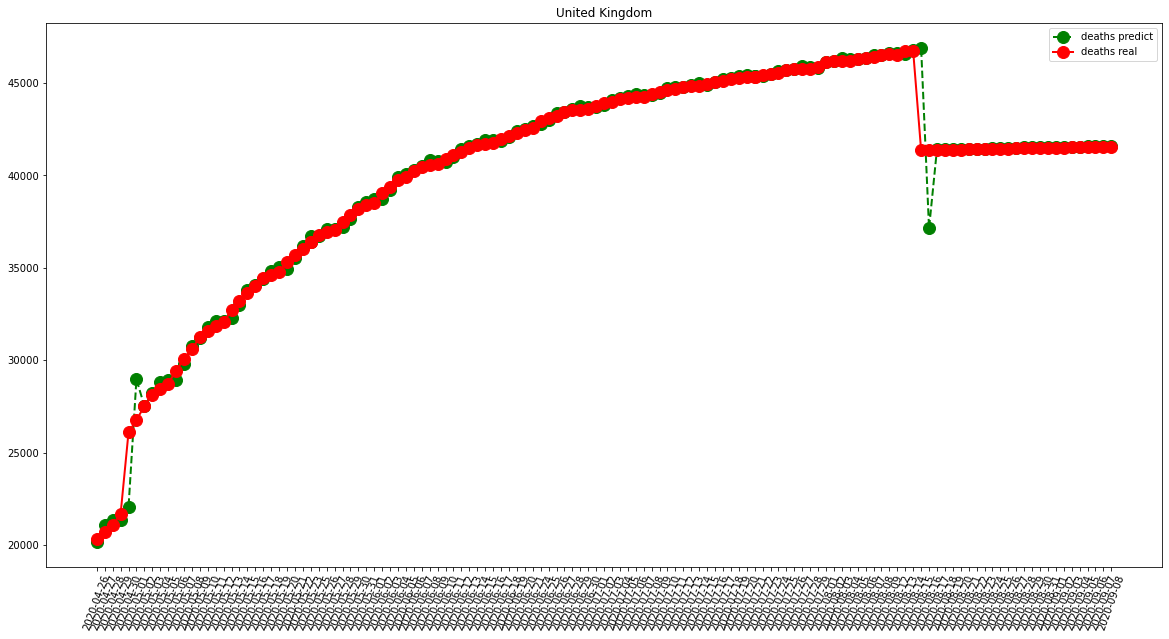

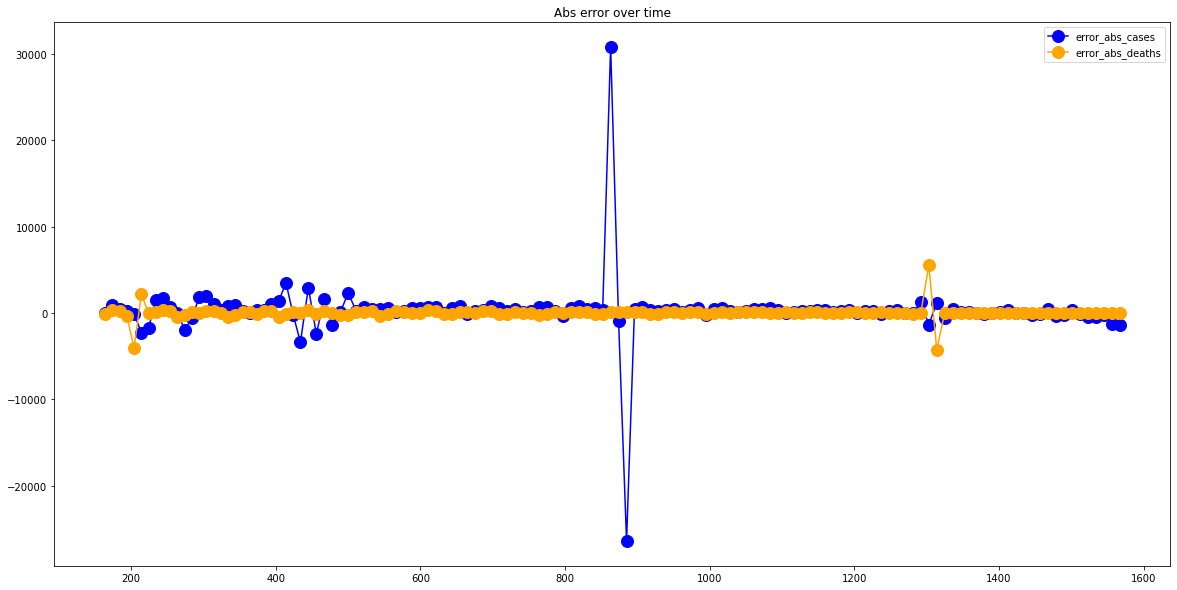

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  406.5496183206107
RMSE =  585.3682340763366
-- Germany performances for deaths --
MAE =  20.251908396946565
RMSE =  38.4426806382761


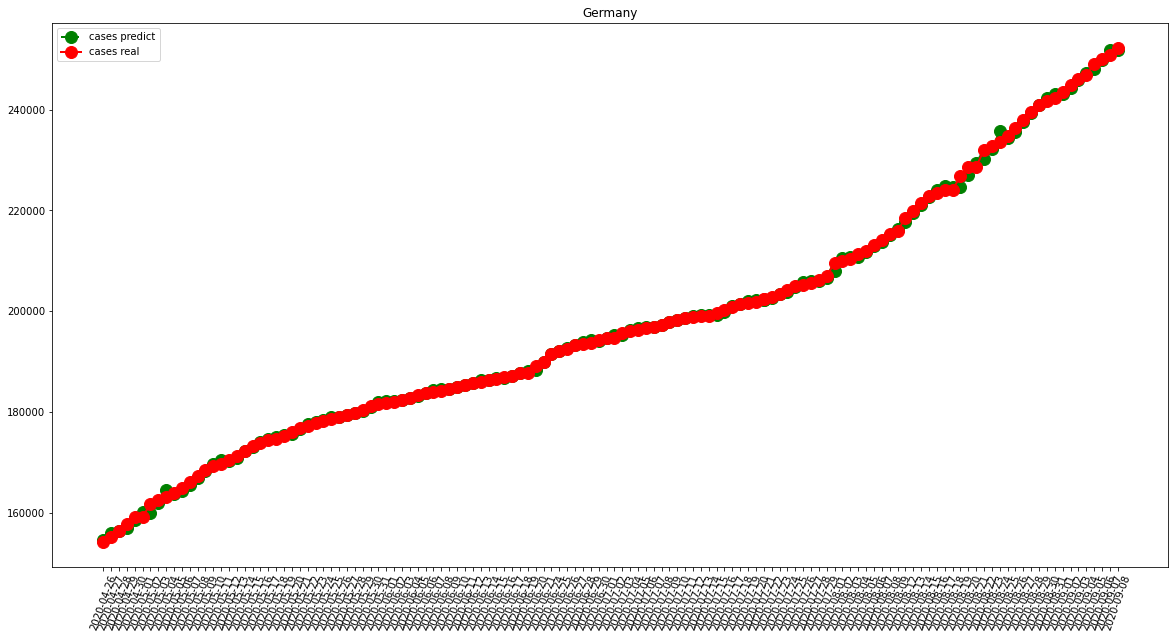

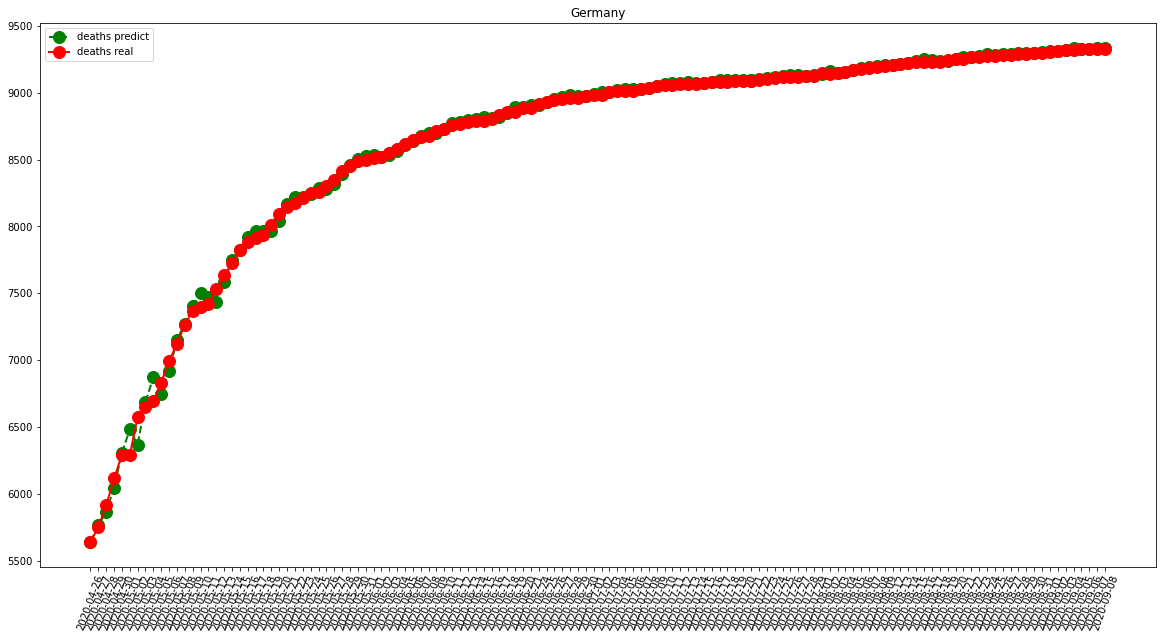

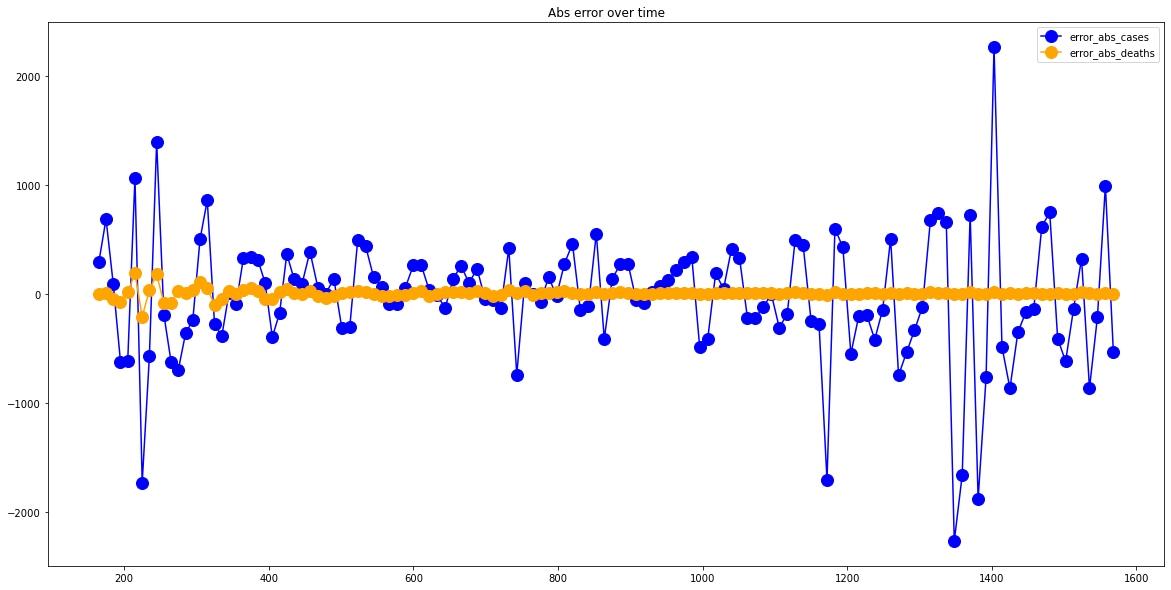

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  862.8167938931298
RMSE =  1237.6022773680422
-- Iran performances for deaths --
MAE =  48.908396946564885
RMSE =  85.10465044119245


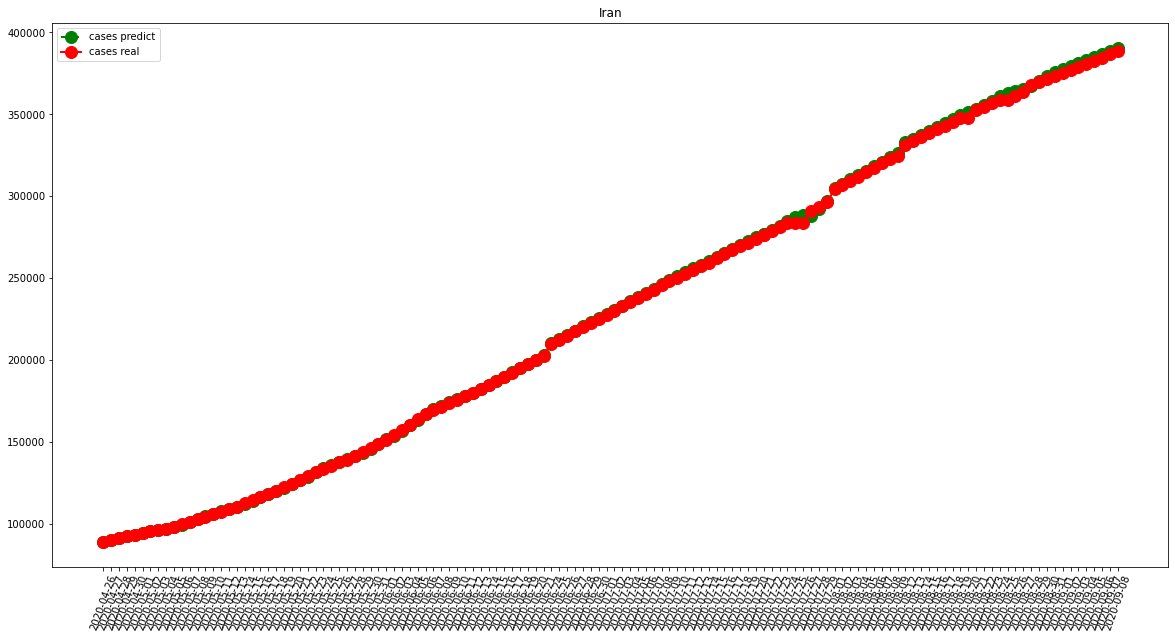

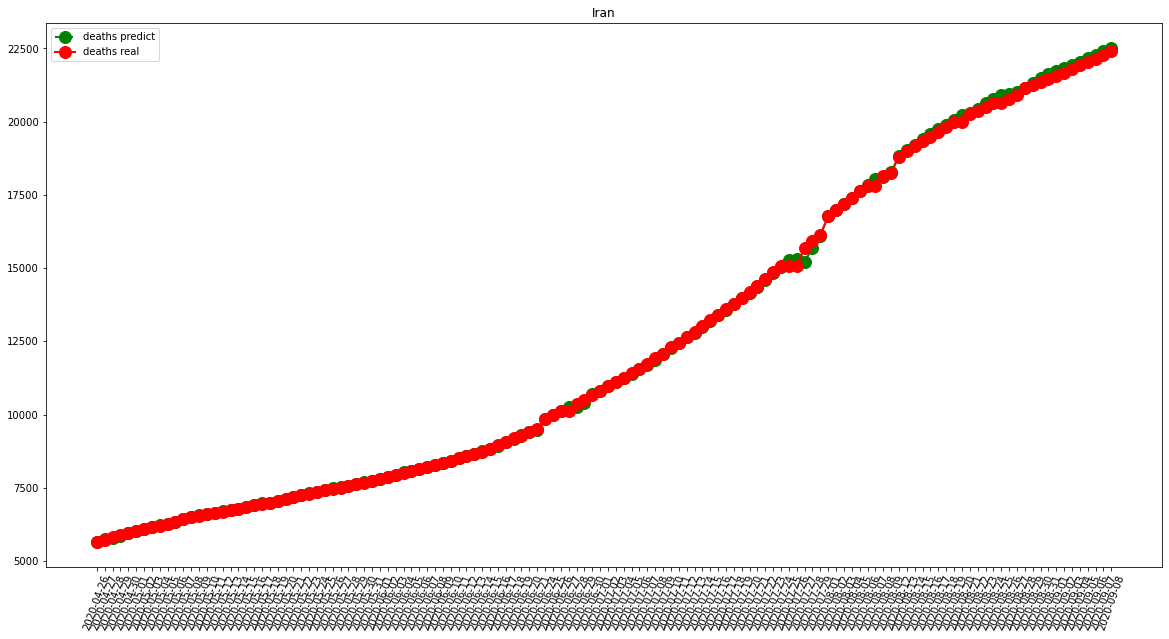

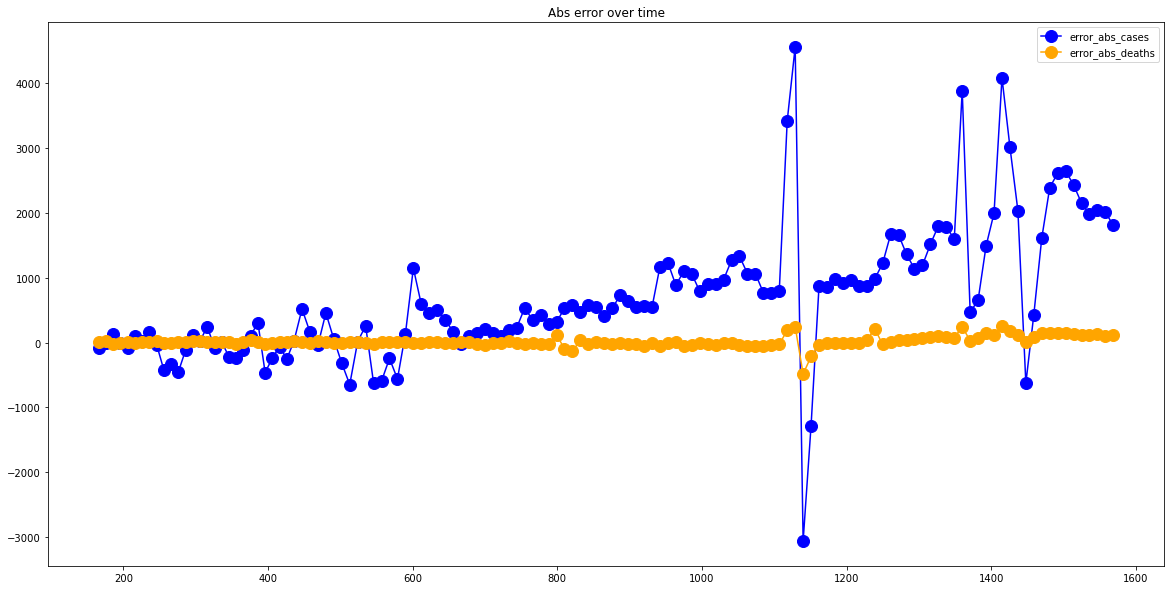

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  208.74045801526717
RMSE =  326.1977225525544
-- Turkey performances for deaths --
MAE =  16.15267175572519
RMSE =  88.80005845538273


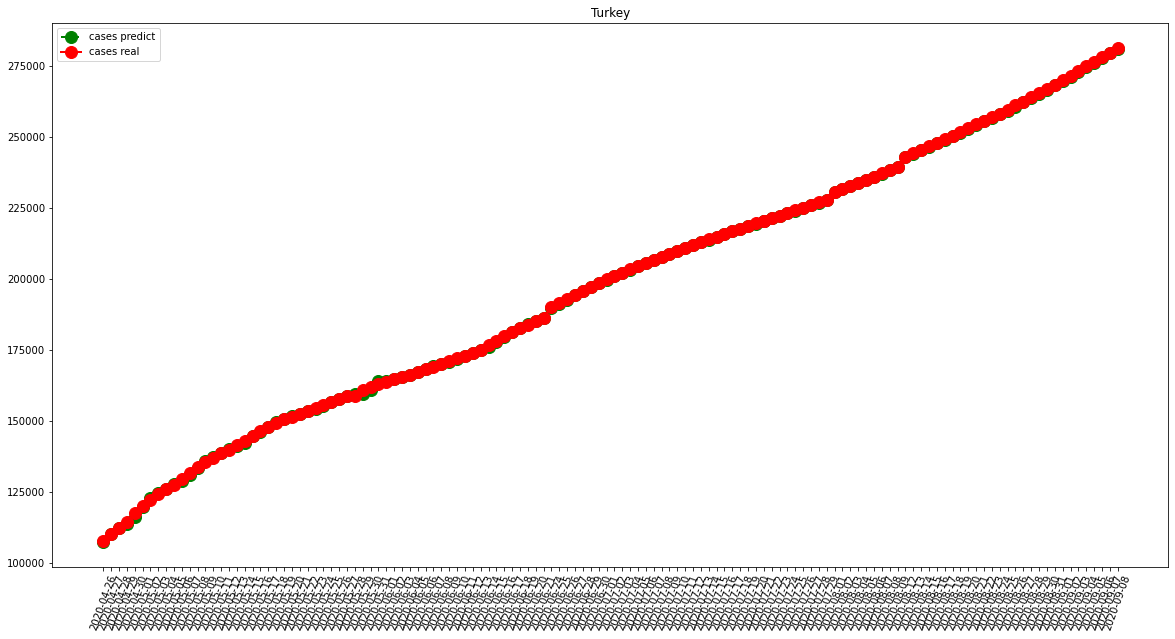

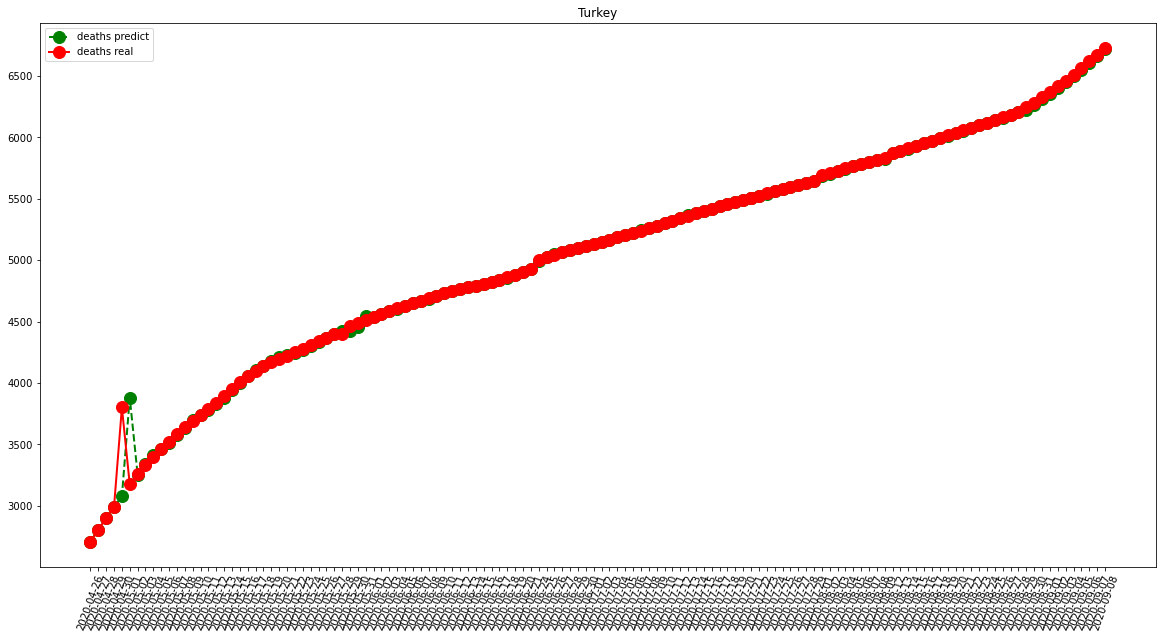

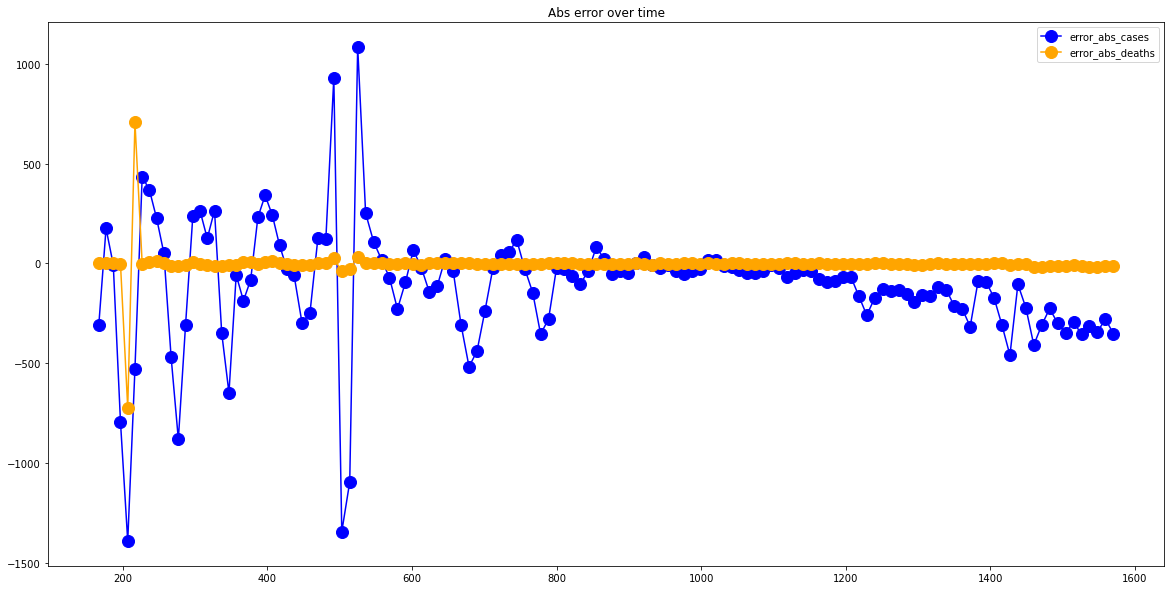

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  14913.461538461539
RMSE =  19979.888862111013
-- Brazil performances for deaths --
MAE =  459.4423076923077
RMSE =  564.6692701178139


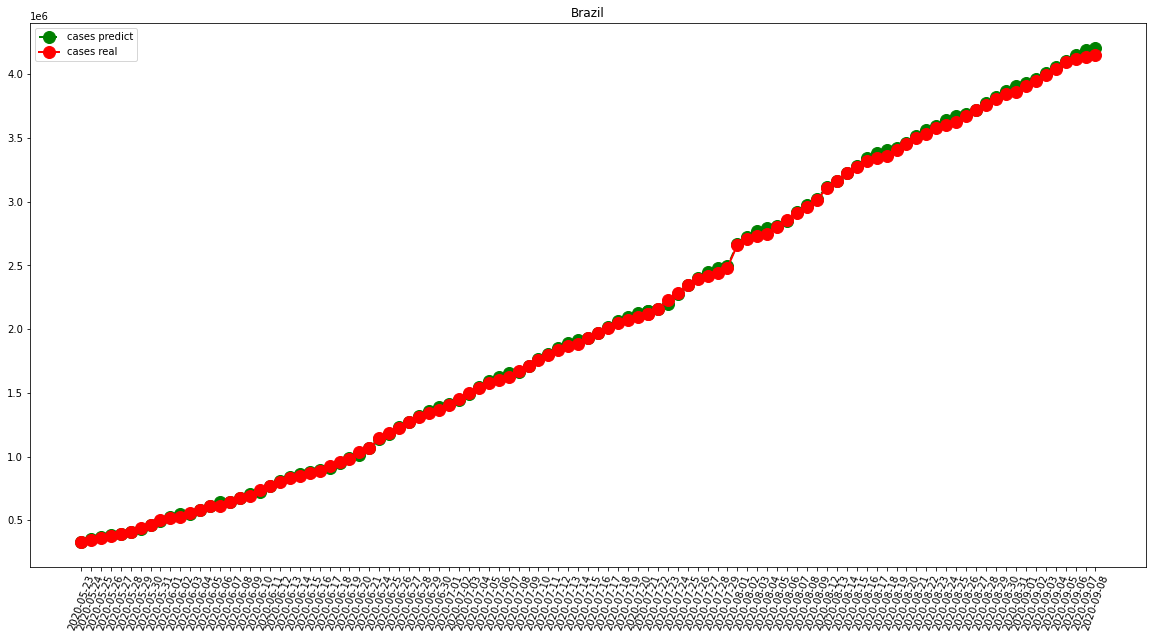

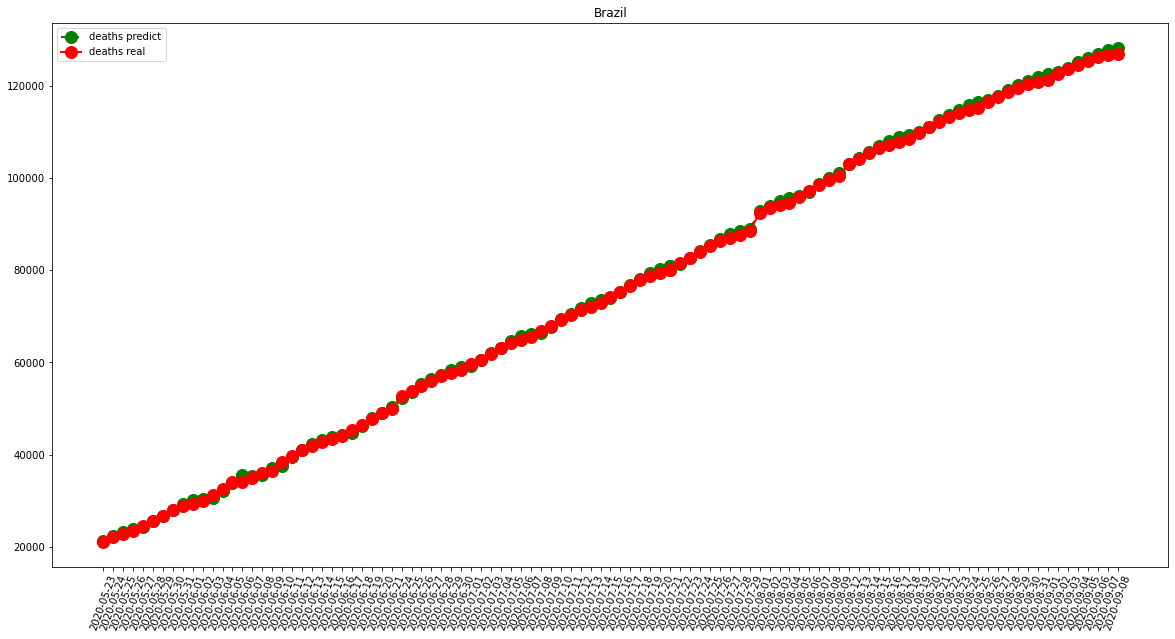

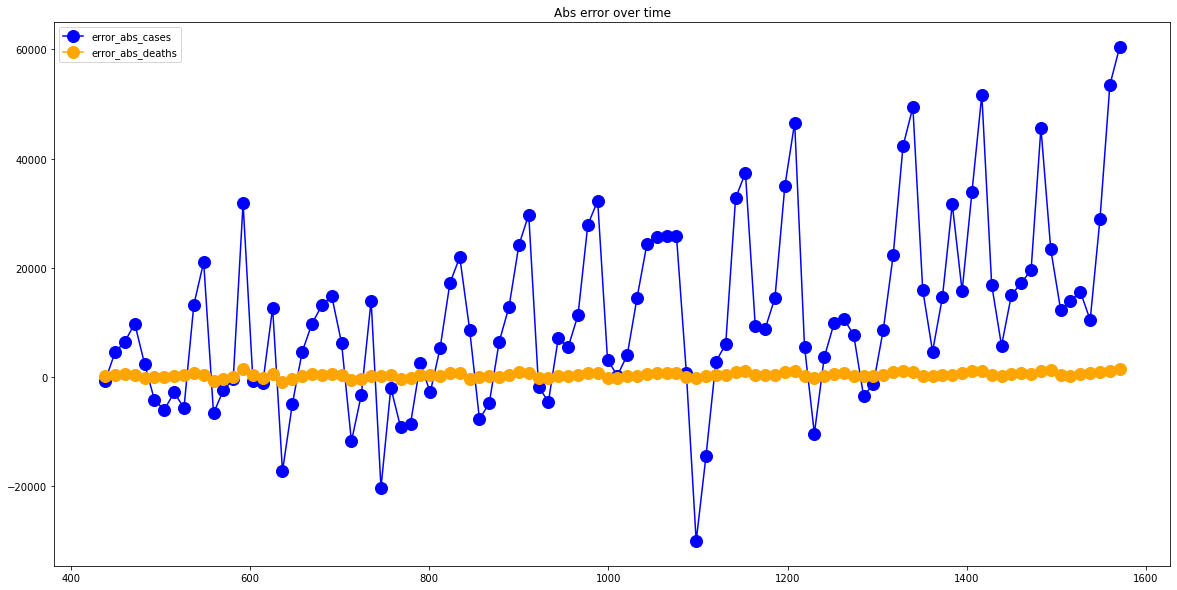

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)